<a href="https://colab.research.google.com/github/iftekharchowdhuryJOY/100-Days-of-Python-Code/blob/main/Assignment_1_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bishop’s University
#####CS 405/CS 505 – Data Mining <br/>
**Assignment 1: Decision Trees**<br/>
* **Name: IFTEKHARUL ISLAM CHOWDHURY**
* **ID: 002-35-2274 Group: AA1 J**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Question 1: Calculate the statistics (mean and standard deviation) of the four explanatory variables: sepal length, sepal width, petal length and petal width.**

In [2]:
# Load the Iris dataset
iris = load_iris()

X = iris.data  # Feature matrix
y = iris.target
feature_names = iris.feature_names  # Names of the features
# For reproducibility
np.random.seed(0)

# Calculate the mean for each feature
means = np.mean(X, axis=0)

# Calculate the standard deviation for each feature
# Using ddof=1 for sample standard deviation
std_devs = np.std(X, axis=0, ddof=1)

# Print the statistics
for feature, mean, std in zip(feature_names, means, std_devs):
    print(f"{feature.capitalize()}: Mean = {mean:.2f}, Standard Deviation = {std:.2f}")



Sepal length (cm): Mean = 5.84, Standard Deviation = 0.83
Sepal width (cm): Mean = 3.06, Standard Deviation = 0.44
Petal length (cm): Mean = 3.76, Standard Deviation = 1.77
Petal width (cm): Mean = 1.20, Standard Deviation = 0.76


**Question 2: How many examples of each class are there?**<br/>

**Answer**: In the Iris dataset, there are a total of 150 instances, and the dataset contains three classes (species of iris plants):

1. Iris setosa
2. Iris versicolor
3. Iris virginica

Each class has:50 examples

Summary:

1. Iris setosa: 50 instances
2. Iris versicolor: 50 instances
3. Iris virginica: 50 instances

This means the dataset is perfectly balanced, with an equal number of instances for each class.

**Verification Using Python**

In [3]:
# Unique classes and their counts
unique_classes, counts = np.unique(y, return_counts=True)

# Map target indices to class names
class_names = [iris.target_names[i] for i in unique_classes]

# Display the counts
print("Number of examples in each class:")
for class_name, count in zip(class_names, counts):
    print(f"{class_name.capitalize()}: {count}")


Number of examples in each class:
Setosa: 50
Versicolor: 50
Virginica: 50


[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

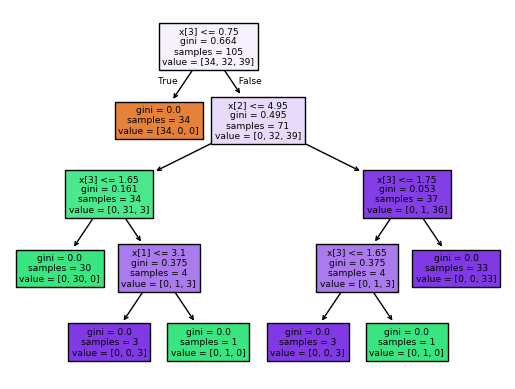

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)

In [5]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [6]:
clf.score(X_test, y_test)

0.9777777777777777

In [7]:
# Evaluate the model
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Default Parameters - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

Default Parameters - Train Accuracy: 1.00, Test Accuracy: 0.98


**Question 3: Change the max_depth and min_samples_leaf parameter values. What do you notice?**

**Answer: Experiment 1: Limiting max_depth**<br/>
**Case A: max_depth = 2**

In [8]:
# Model with max_depth = 2
clf_depth2 = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
clf_depth2.fit(X_train, y_train)

# Predictions
y_train_pred = clf_depth2.predict(X_train)
y_test_pred = clf_depth2.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"max_depth=2 Training Accuracy: {train_accuracy:.2f}")
print(f"max_depth=2 Test Accuracy: {test_accuracy:.2f}")


max_depth=2 Training Accuracy: 0.96
max_depth=2 Test Accuracy: 0.91


**Case B: max_depth = 5**

In [9]:
# Model with max_depth = 5
clf_depth5 = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf_depth5.fit(X_train, y_train)

# Predictions
y_train_pred = clf_depth5.predict(X_train)
y_test_pred = clf_depth5.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"max_depth=5 Training Accuracy: {train_accuracy:.2f}")
print(f"max_depth=5 Test Accuracy: {test_accuracy:.2f}")


max_depth=5 Training Accuracy: 1.00
max_depth=5 Test Accuracy: 0.98


**Experiment 2: Adjusting min_samples_leaf**<br/>
**Case A: min_samples_leaf = 5**

In [10]:
# Model with min_samples_leaf = 5
clf_min_leaf5 = tree.DecisionTreeClassifier(min_samples_leaf=5, random_state=0)
clf_min_leaf5.fit(X_train, y_train)

# Predictions
y_train_pred = clf_min_leaf5.predict(X_train)
y_test_pred = clf_min_leaf5.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"min_samples_leaf=5 Training Accuracy: {train_accuracy:.2f}")
print(f"min_samples_leaf=5 Test Accuracy: {test_accuracy:.2f}")


min_samples_leaf=5 Training Accuracy: 0.96
min_samples_leaf=5 Test Accuracy: 0.91


**Case B: min_samples_leaf = 10**

In [11]:
# Model with min_samples_leaf = 10
clf_min_leaf10 = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
clf_min_leaf10.fit(X_train, y_train)

# Predictions
y_train_pred = clf_min_leaf10.predict(X_train)
y_test_pred = clf_min_leaf10.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"min_samples_leaf=10 Training Accuracy: {train_accuracy:.2f}")
print(f"min_samples_leaf=10 Test Accuracy: {test_accuracy:.2f}")


min_samples_leaf=10 Training Accuracy: 0.96
min_samples_leaf=10 Test Accuracy: 0.91


**Experiment 3: Combining max_depth and min_samples_leaf**<br/>
**Case A: max_depth = 3, min_samples_leaf = 5**

In [12]:
# Model with max_depth = 3 and min_samples_leaf = 5
clf_combined = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)
clf_combined.fit(X_train, y_train)

# Predictions
y_train_pred = clf_combined.predict(X_train)
y_test_pred = clf_combined.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"max_depth=3, min_samples_leaf=5 Training Accuracy: {train_accuracy:.2f}")
print(f"max_depth=3, min_samples_leaf=5 Test Accuracy: {test_accuracy:.2f}")


max_depth=3, min_samples_leaf=5 Training Accuracy: 0.96
max_depth=3, min_samples_leaf=5 Test Accuracy: 0.91


**Visualize the trees**


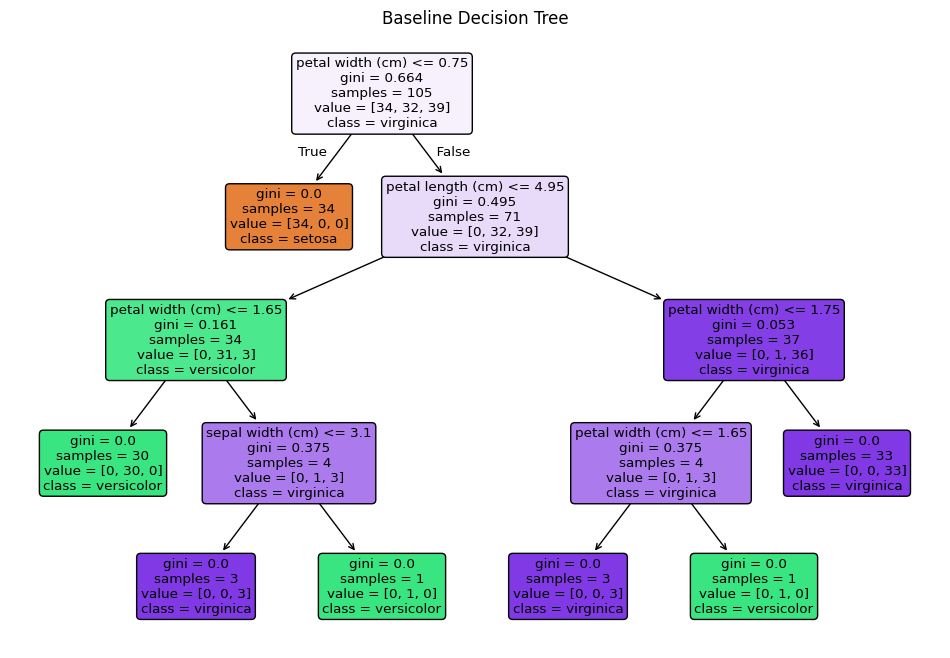

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True
)
plt.title("Baseline Decision Tree")
plt.show()


**max_depth = 2**

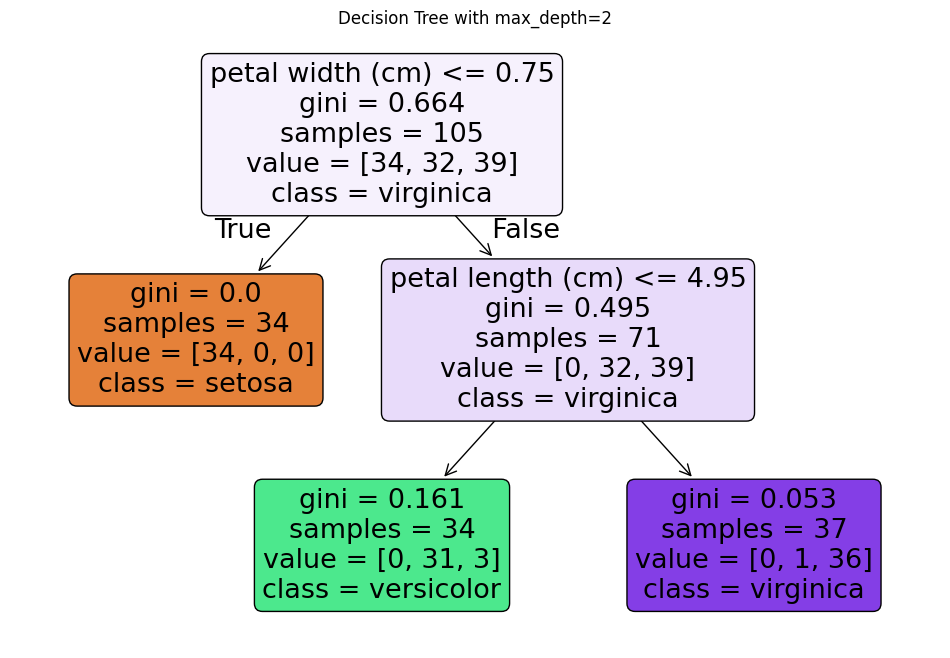

In [14]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf_depth2,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True
)
plt.title("Decision Tree with max_depth=2")
plt.show()


**min_samples_leaf = 10**

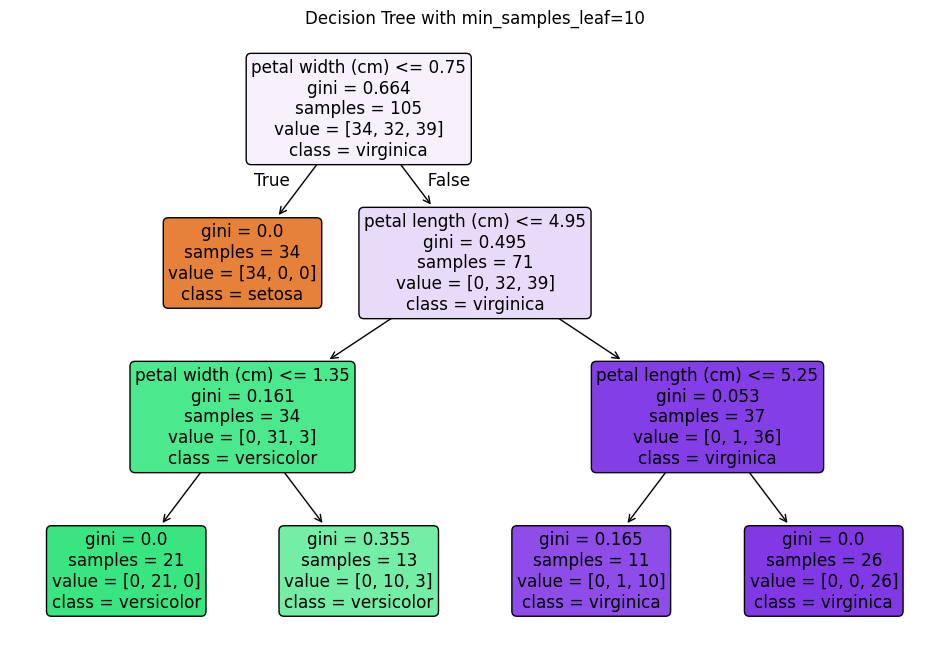

In [15]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf_min_leaf10,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True
)
plt.title("Decision Tree with min_samples_leaf=10")
plt.show()


**Question 4: The problem here being particularly simple, redo a training/test division with 5% of the data in training and 95% test. Calculate the rate of misclassified items on the test set. Vary (or better, perform a grid search with GridSearchCV) the values of the max_depth and min_samples_leaf parameters to measure their impact on this score.**

In [16]:
# Split the Dataset (5% Training, 95% Testing)
# Perform the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.05, random_state=0, stratify=y
)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Check the distribution of classes in the training set
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(iris.target_names[unique], counts))
print("Class distribution in training set:", class_distribution)

# Initialize the classifier with default parameters
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the number of misclassified samples
num_misclassified = (y_test != y_pred).sum()
total_test_samples = y_test.shape[0]
misclassification_rate = num_misclassified / total_test_samples

print(f"Misclassified samples: {num_misclassified} out of {total_test_samples}")
print(f"Misclassification rate: {misclassification_rate:.2f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Misclassification rate is 1 - accuracy
misclassification_rate = 1 - accuracy

print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification rate: {misclassification_rate:.2f}")


Training set size: 7 samples
Test set size: 143 samples
Class distribution in training set: {'setosa': 2, 'versicolor': 2, 'virginica': 3}
Misclassified samples: 25 out of 143
Misclassification rate: 0.17
Accuracy: 0.83
Misclassification rate: 0.17


##**Varying Parameters Using GridSearchCV**

In [17]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
from sklearn.model_selection import StratifiedShuffleSplit

# Define a custom cross-validator to handle the small training set
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.33, random_state=0)
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,  # Using custom cross-validator
    n_jobs=-1,
    return_train_score=True
)

# Perform grid search
grid_search.fit(X_train, y_train)
# Best parameters
print("Best Parameters:", grid_search.best_params_)
# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

# Calculate misclassification rate
accuracy_best = accuracy_score(y_test, y_pred_best)
misclassification_rate_best = 1 - accuracy_best

print(f"Best Model Accuracy: {accuracy_best:.2f}")
print(f"Best Model Misclassification Rate: {misclassification_rate_best:.2f}")
# Create a DataFrame from grid search results
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract relevant columns
results_df = results_df[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'mean_train_score']]

# Sort by mean_test_score
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Grid Search Results:")
print(results_df)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1}
Best Model Accuracy: 0.83
Best Model Misclassification Rate: 0.17
Grid Search Results:
   param_max_depth  param_min_samples_leaf  mean_test_score  mean_train_score
0             None                       1         0.666667              1.00
15               4                       1         0.666667              1.00
21               5                       2         0.666667              0.75
5                2                       1         0.666667              1.00
6                2                       2         0.666667              0.75
20               5                       1         0.666667              1.00
10               3                       1         0.666667              1.00
11               3                       2         0.666667              0.75
1             None                       2         0.666667              0.75
16               4                       2         0.666667              

##**Visualizing the Impact of Parameters**
**Heatmap of Mean Test Scores**

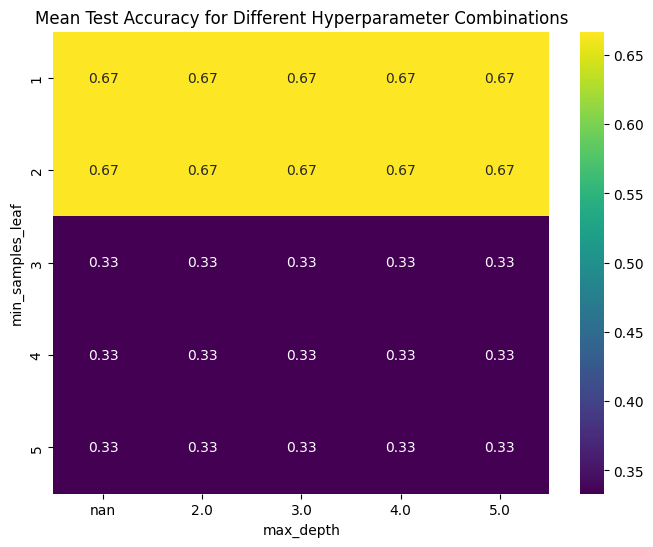

In [18]:
# Pivot the results to create a heatmap
pivot_table = results_df.pivot(index='param_min_samples_leaf', columns='param_max_depth', values='mean_test_score')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis')
plt.title('Mean Test Accuracy for Different Hyperparameter Combinations')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.show()


##**Question 5: Redo the display for the other pairs of attributes. On which pair is the separation between the classes the most marked?**

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

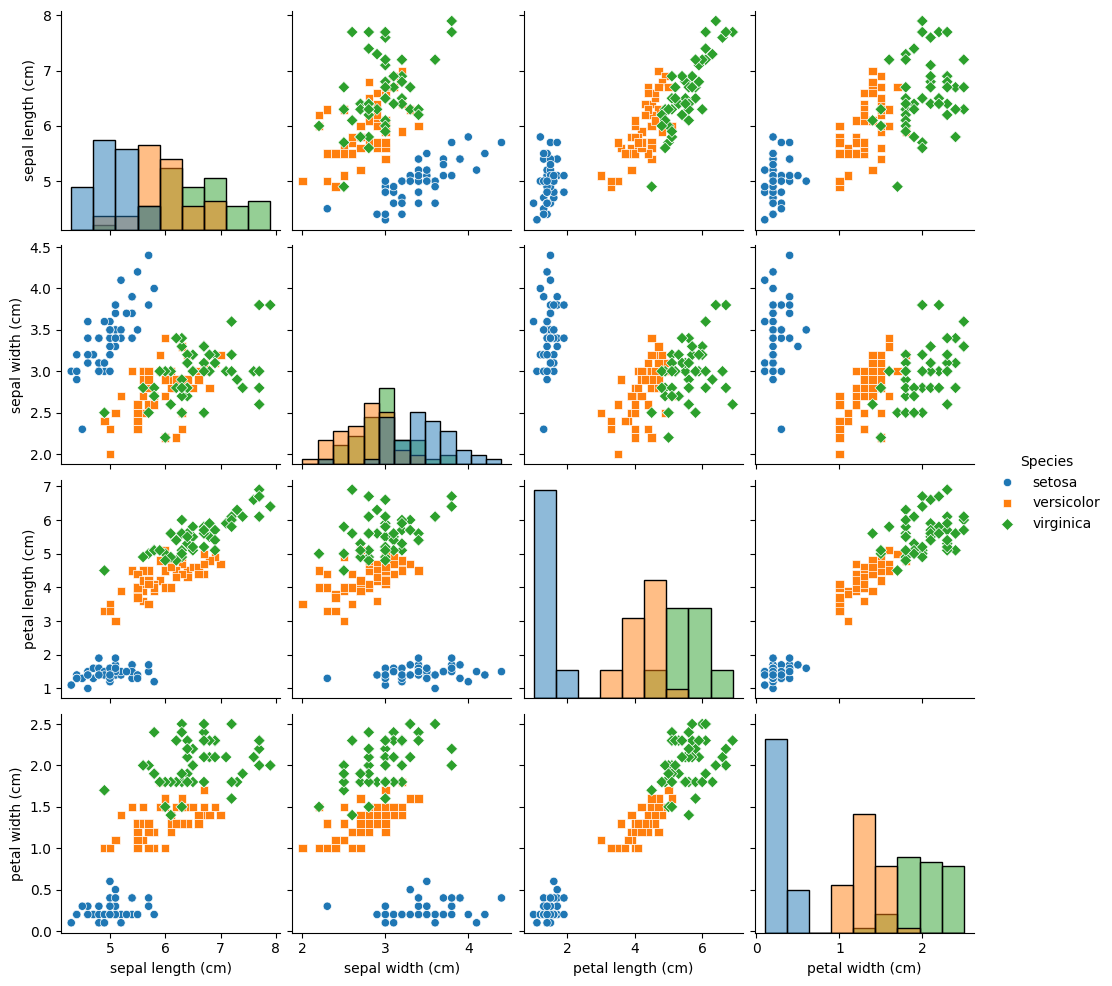

In [19]:
#Visualizing All Pairs of Attributes
# Using Seaborn's PairPlot
# Create a pairplot

# Create a DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable as species names
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows
print(df.head())

sns.pairplot(df, hue='Species', markers=['o', 's', 'D'], diag_kind='hist')
plt.show()


##Individual Plots and Analysis
###Pair 1: Sepal length vs. Sepal width

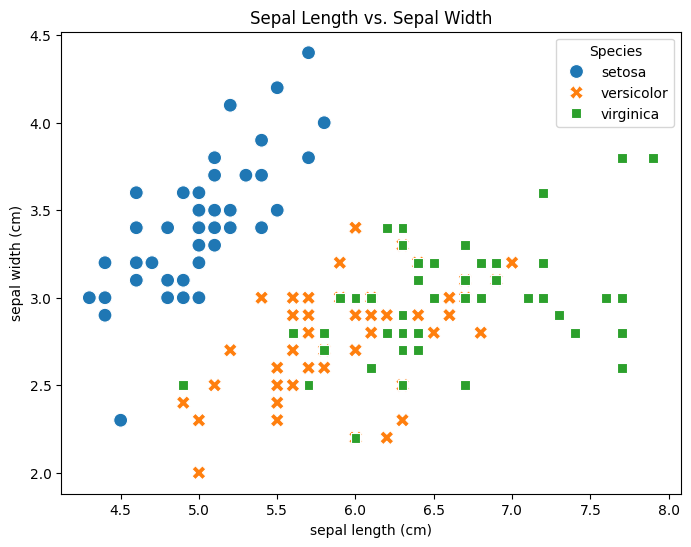

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Species', style='Species', s=100)
plt.title('Sepal Length vs. Sepal Width')
plt.show()


#Pair 2: Sepal length vs. Petal length


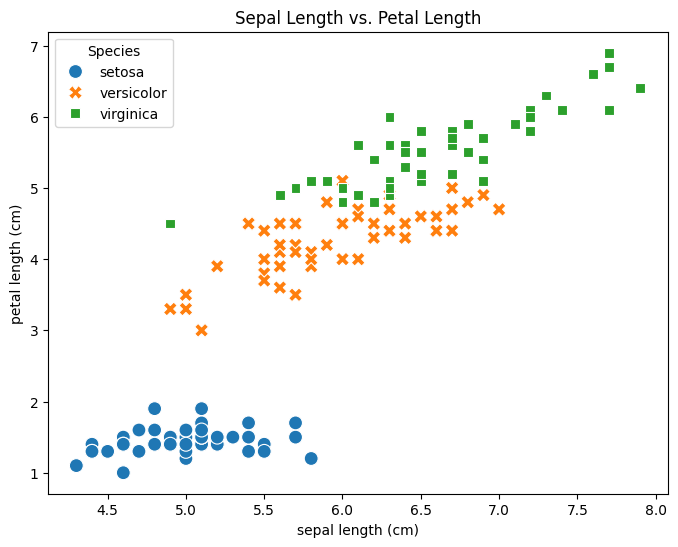

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='Species', style='Species', s=100)
plt.title('Sepal Length vs. Petal Length')
plt.show()


##**Pair 3: Sepal length vs. Petal width**

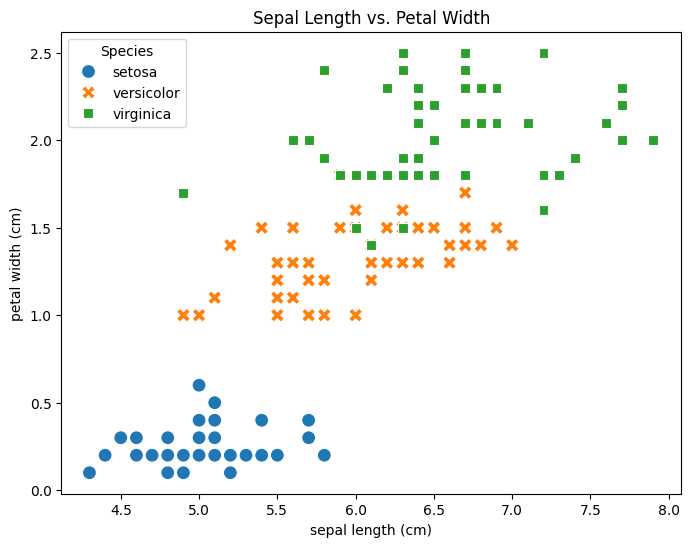

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal width (cm)', hue='Species', style='Species', s=100)
plt.title('Sepal Length vs. Petal Width')
plt.show()


**Pair 4: Sepal width vs. Petal length**

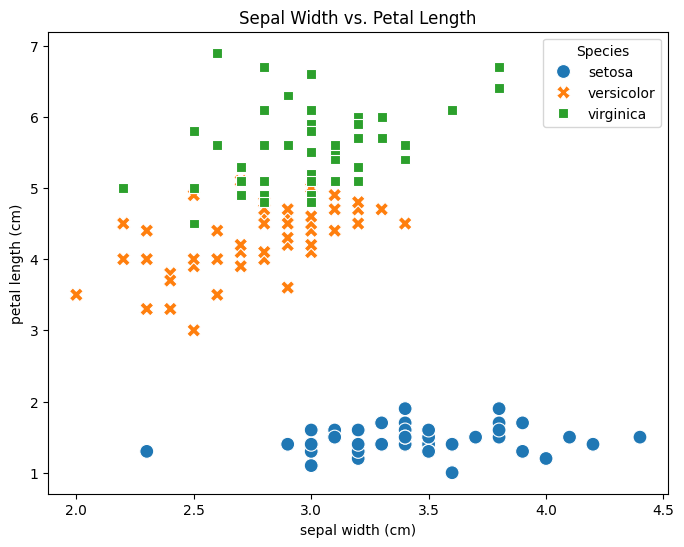

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal width (cm)', y='petal length (cm)', hue='Species', style='Species', s=100)
plt.title('Sepal Width vs. Petal Length')
plt.show()


**Pair 5: Sepal width vs. Petal width**

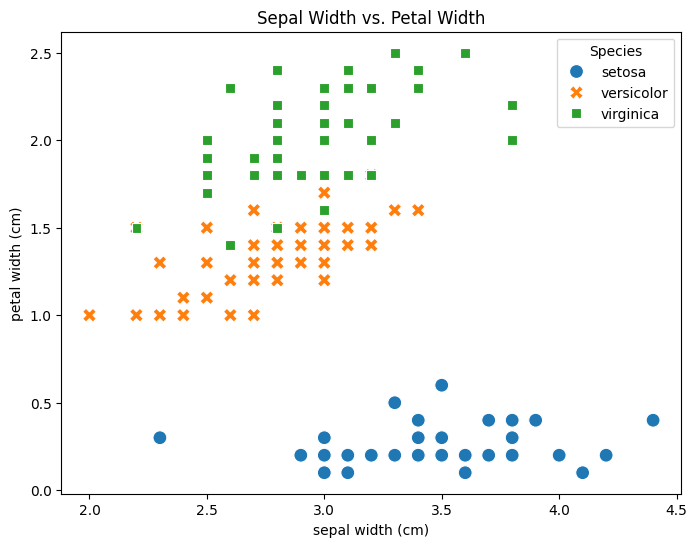

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal width (cm)', y='petal width (cm)', hue='Species', style='Species', s=100)
plt.title('Sepal Width vs. Petal Width')
plt.show()


**Pair 6: Petal length vs. Petal width**

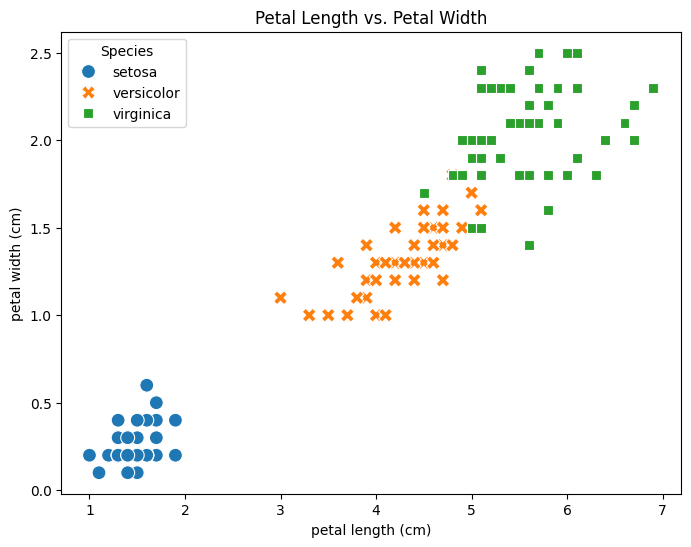

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='Species', style='Species', s=100)
plt.title('Petal Length vs. Petal Width')
plt.show()


**Visual Confirmation**

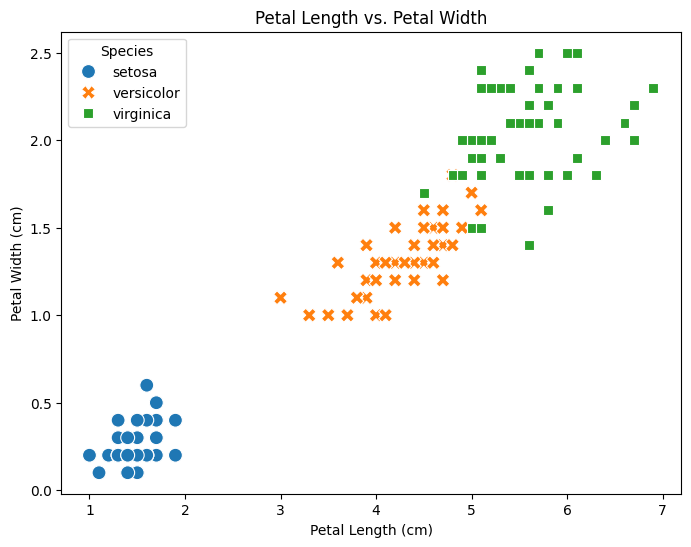

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='Species', style='Species', s=100)
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species', loc='upper left')
plt.show()


**Quantitative Measures**<br/>
To further support our conclusion, we can perform a statistical analysis.

In [27]:
# Group data by species
grouped = df.groupby('Species')

# Calculate mean and standard deviation for petal length and width
petal_stats = grouped[['petal length (cm)', 'petal width (cm)']].agg(['mean', 'std'])
print(petal_stats)


           petal length (cm)           petal width (cm)          
                        mean       std             mean       std
Species                                                          
setosa                 1.462  0.173664            0.246  0.105386
versicolor             4.260  0.469911            1.326  0.197753
virginica              5.552  0.551895            2.026  0.274650


<ipython-input-27-f960c2d4e54a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Species')


**Answer Summary**<br>
The pair of attributes with the most marked separation between the classes is:

**Petal length and Petal width**

This pair provides clear separation among all three species.
Visualizations and statistical analysis confirm the distinct clustering of species based on these attributes.

**Question 6: Change the value of the max_depth parameter. What happens if we take too large a value? Too small? Change the rate of elements affected by noise (the y[::5]). When all elements are affected by noise, should a high or low value for max_depth be preferred?**

##Introducing Noise into the Dataset <br/>
To simulate noisy data, we'll alter the target labels y by modifying every nth element. For example, setting y[::5] introduces noise to every 5th element.


In [28]:
# Introduce noise by randomly changing every 5th label
import random

# Copy the original labels
y_noisy = y.copy()

# Get unique classes
classes = np.unique(y)

# Introduce noise to every 5th label
for i in range(0, len(y_noisy), 5):
    # Assign a random class different from the original
    original_class = y_noisy[i]
    possible_classes = list(classes[classes != original_class])
    y_noisy[i] = random.choice(possible_classes)

from sklearn.model_selection import train_test_split

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train_noisy, y_test_noisy = train_test_split(
    X, y_noisy, train_size=0.7, random_state=0
)


##**Training and Evaluating the Model**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a range of max_depth values
max_depth_values = [None, 1, 2, 3, 5, 10]

# Store results
results = []

for depth in max_depth_values:
    # Initialize the classifier with the specified max_depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train_noisy)

    # Predict on training and test sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_noisy, y_train_pred)
    test_accuracy = accuracy_score(y_test_noisy, y_test_pred)

    # Store the results
    results.append({
        'max_depth': depth,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

# Display the results
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)


   max_depth  train_accuracy  test_accuracy
0        NaN        1.000000       0.577778
1        1.0        0.600000       0.444444
2        2.0        0.742857       0.577778
3        3.0        0.752381       0.577778
4        5.0        0.819048       0.688889
5       10.0        1.000000       0.577778


##**Changing the Rate of Noise**

In [30]:
def add_noise(y, noise_level):
    """
    Introduce noise to the labels at the specified noise level.
    noise_level: Proportion of labels to be altered (0 to 1).
    """
    y_noisy = y.copy()
    n_samples = len(y)
    n_noisy = int(n_samples * noise_level)
    indices = np.random.choice(n_samples, n_noisy, replace=False)

    for i in indices:
        original_class = y_noisy[i]
        possible_classes = list(classes[classes != original_class])
        y_noisy[i] = random.choice(possible_classes)
    return y_noisy
# Define different noise levels (e.g., 0%, 20%, 50%, 100%)
noise_levels = [0.0, 0.2, 0.5, 1.0]

# Use a fixed max_depth for this experiment
fixed_max_depth = 3

# Store results
noise_results = []

for noise in noise_levels:
    # Add noise to the labels
    y_noisy = add_noise(y, noise)

    # Split the dataset
    X_train, X_test, y_train_noisy, y_test_noisy = train_test_split(
        X, y_noisy, train_size=0.7, random_state=0
    )

    # Train the classifier
    clf = DecisionTreeClassifier(max_depth=fixed_max_depth, random_state=0)
    clf.fit(X_train, y_train_noisy)

    # Predict on test set
    y_test_pred = clf.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test_noisy, y_test_pred)

    # Store the results
    noise_results.append({
        'noise_level': noise,
        'test_accuracy': test_accuracy
    })

# Display the results
noise_results_df = pd.DataFrame(noise_results)
print(noise_results_df)



   noise_level  test_accuracy
0          0.0       0.977778
1          0.2       0.777778
2          0.5       0.288889
3          1.0       0.511111


**Effect of max_depth in Noisy Conditions**

In [31]:
# Noise level of 100%
noise_level = 1.0
y_noisy = add_noise(y, noise_level)

# Split the dataset
X_train, X_test, y_train_noisy, y_test_noisy = train_test_split(
    X, y_noisy, train_size=0.7, random_state=0
)

# Define a range of max_depth values
max_depth_values = [None, 1, 2, 3, 5, 10]

# Store results
noise_100_results = []

for depth in max_depth_values:
    # Initialize the classifier
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train_noisy)

    # Predict on test set
    y_test_pred = clf.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test_noisy, y_test_pred)

    # Store the results
    noise_100_results.append({
        'max_depth': depth,
        'test_accuracy': test_accuracy
    })

# Display the results
noise_100_results_df = pd.DataFrame(noise_100_results)
print(noise_100_results_df)


   max_depth  test_accuracy
0        NaN       0.644444
1        1.0       0.400000
2        2.0       0.355556
3        3.0       0.466667
4        5.0       0.533333
5       10.0       0.644444


**Question 7: To deepen, load the Diabetes dataset from the sklearn.datasets module and make a random partition into learning part and test part (70% learning, 30% testing). Build a regression tree model on this basis. Calculate the root mean square error on the test set. Do a grid search to find the max_depth parameter value that minimizes this error.**

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes


1. **Loading the Diabetes Dataset**

In [33]:
# Load the Diabetes dataset
diabetes = load_diabetes()

# Features and target
X = diabetes.data    # Feature matrix
y = diabetes.target  # Target vector

# Feature names
feature_names = diabetes.feature_names

# Check the shape of the data
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Feature matrix shape: (442, 10)
Target vector shape: (442,)


2. **Splitting the Dataset**

In [34]:
from sklearn.model_selection import train_test_split
# Set a random seed for reproducibility
random_state = 42

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 309 samples
Test set size: 133 samples


3. **Building a Regression Tree Model**

In [35]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the regressor
regressor = DecisionTreeRegressor(random_state=random_state)

# Train the regressor
regressor.fit(X_train, y_train)
# Predict on the test set
y_pred = regressor.predict(X_test)



4. **Calculating the Root Mean Square Error (RMSE)**

In [36]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error (RMSE) on the test set: {rmse:.2f}")


Root Mean Square Error (RMSE) on the test set: 75.48


5. **Performing Grid Search to Optimize max_depth**

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
# Define the parameter grid
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
}
# Define a custom scoring function
from sklearn.metrics import make_scorer

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

neg_rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=random_state),
    param_grid=param_grid,
    scoring=neg_rmse_scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)
# Perform grid search on the training data
grid_search.fit(X_train, y_train)
# Best parameters
best_max_depth = grid_search.best_params_['max_depth']
print(f"Optimal max_depth: {best_max_depth}")

# Retrieve the best estimator
best_regressor = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_regressor.predict(X_test)

# Calculate RMSE
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print(f"Best RMSE on the test set: {rmse_best:.2f}")


Optimal max_depth: 3
Best RMSE on the test set: 60.14


6. **Analyzing the Results**

Initial RMSE (default max_depth): 75.48
Optimized RMSE (max_depth=3): 60.14


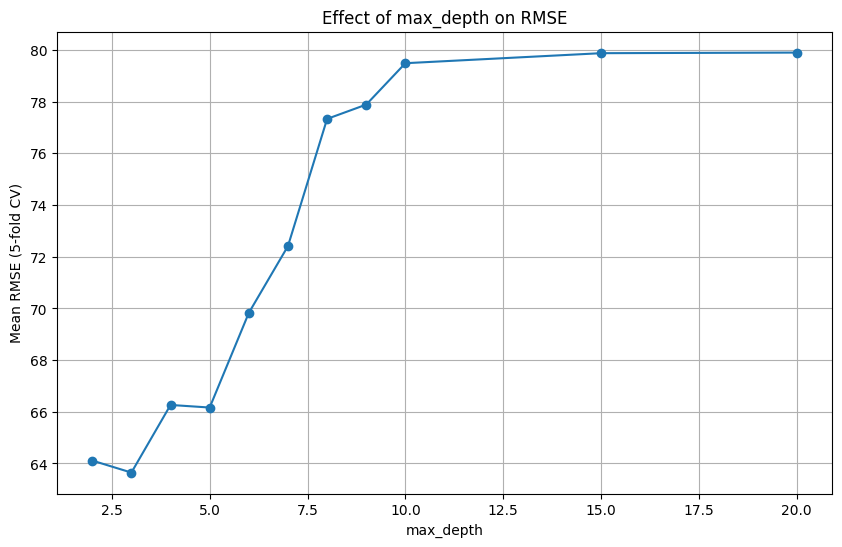

In [38]:
print(f"Initial RMSE (default max_depth): {rmse:.2f}")
print(f"Optimized RMSE (max_depth={best_max_depth}): {rmse_best:.2f}")
# Extract the results from grid search
results = pd.DataFrame(grid_search.cv_results_)

# Calculate mean RMSE (convert negative RMSE to positive)
results['mean_rmse'] = -results['mean_test_score']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], results['mean_rmse'], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean RMSE (5-fold CV)')
plt.title('Effect of max_depth on RMSE')
plt.grid(True)
plt.show()


##Implementing the Feature Importance Plot

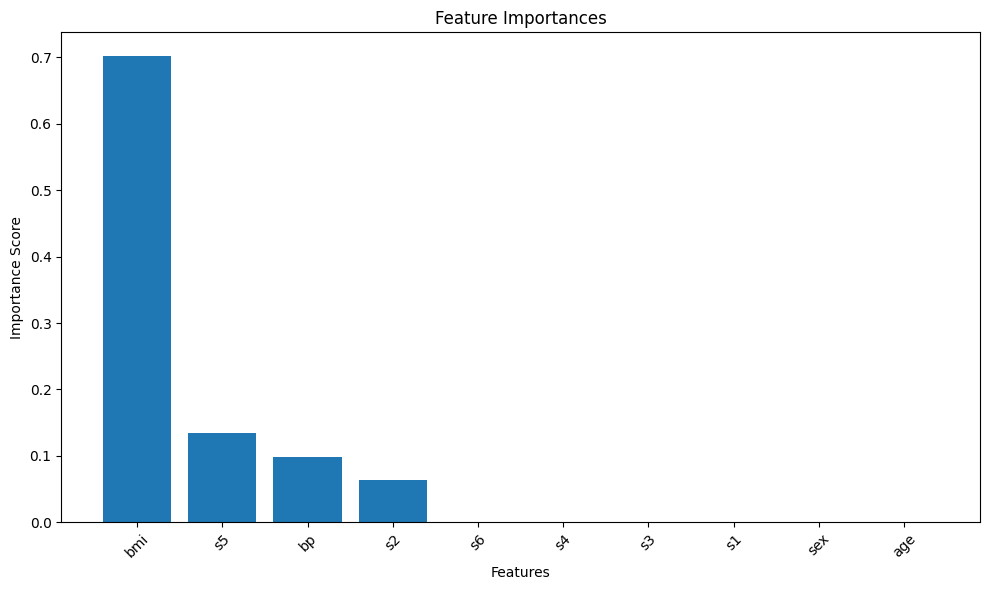

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'best_regressor' is my trained model from the grid search
importances = best_regressor.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()
